<a href="https://colab.research.google.com/github/kokatesaurabh/StockPrediction/blob/main/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Stage 1: Import Libraries and Load Data***

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('nse_stock_data_small.csv')
print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
                  Date Stock Symbol     Open     High      Low    Close  \
0  2020-01-01 00:00:00     RELIANCE  2810.08  2815.15  2776.51  2779.13   
1  2020-01-01 00:01:00     RELIANCE   588.63   608.01   528.46   545.42   
2  2020-01-01 00:02:00     RELIANCE   617.24   625.57   610.29   619.07   
3  2020-01-01 00:03:00     RELIANCE  2137.27  2139.13  2096.47  2103.62   
4  2020-01-01 00:04:00     RELIANCE  2358.22  2368.70  2295.99  2309.83   

     Volume  
0  123709.0  
1  796854.0  
2  445355.0  
3  480039.0  
4  114751.0  


***Stage 2: Data Preprocessing***

In [2]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# We'll predict the 'Close' price
# Create features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close'
    return np.array(X), np.array(y)

# Set sequence length (how many past minutes to look at)
sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (27672, 10, 5)
y shape: (27672,)


***Stage 3: Split Data and Create Model***

In [3]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 100)             │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,901 (288.68 KB)

 Trainable params: 73,901 (288.68 KB)

 Non-trainable params: 0 (0.00 B)

***Stage 4: Train the Model***

Epoch 1/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.0918 - val_loss: 0.0768
Epoch 2/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0789 - val_loss: 0.0768
Epoch 3/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0790 - val_loss: 0.0773
Epoch 4/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0793 - val_loss: 0.0778
Epoch 5/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0793 - val_loss: 0.0769
Epoch 6/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0785 - val_loss: 0.0777
Epoch 7/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0794 - val_loss: 0.0769
Epoch 8/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0795 - val_loss: 0.0768
Epoch 9/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0789 - val_loss: 0.0768
Epoch 10/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0790 - val_loss: 0.0775
Epoch 11/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0788 - val_loss: 0.0768
Epoch 12/50
623/623 ━━━━━━━━━━━━━━

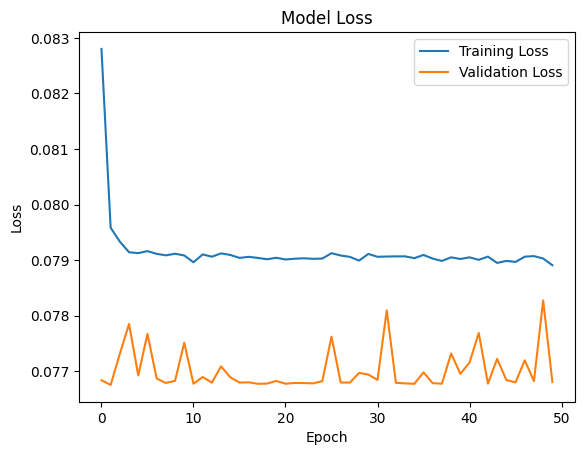

In [4]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

***Stage 5: Make Predictions and Evaluate***

173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Root Mean Squared Error: nan


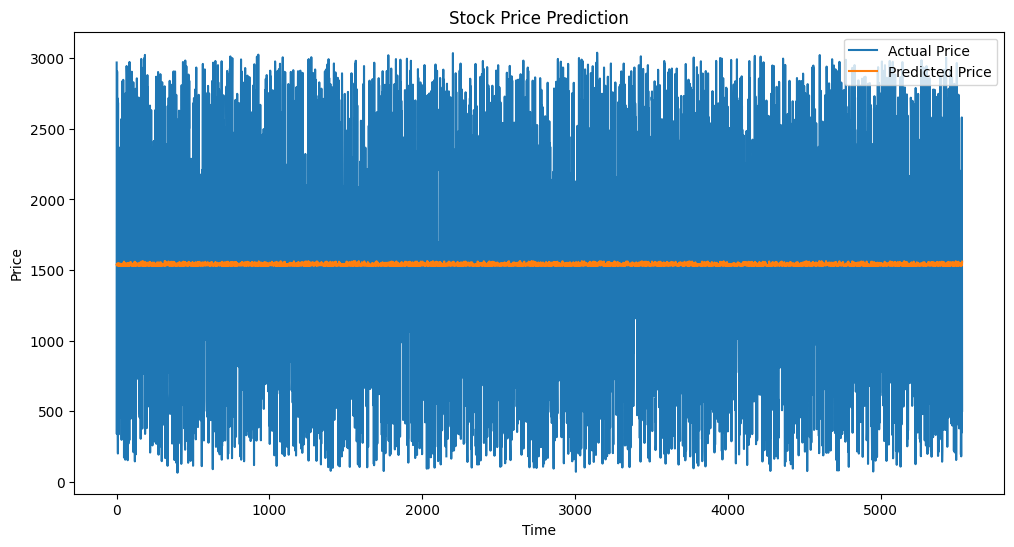

In [5]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
# Create a dummy array with same shape as scaled_data for inverse transform
dummy = np.zeros((len(predictions), len(features)))
dummy[:, 3] = predictions.flatten()  # Put predictions in 'Close' column
predictions_transformed = scaler.inverse_transform(dummy)[:, 3]

dummy = np.zeros((len(y_test), len(features)))
dummy[:, 3] = y_test
y_test_transformed = scaler.inverse_transform(dummy)[:, 3]

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions_transformed - y_test_transformed) ** 2))
print(f"Root Mean Squared Error: {rmse}")

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_transformed, label='Actual Price')
plt.plot(predictions_transformed, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

***Stage 6: Make Future Prediction***

In [6]:
# Function to predict next price
def predict_next_price(model, last_sequence, scaler):
    last_sequence = last_sequence.reshape((1, sequence_length, len(features)))
    next_pred = model.predict(last_sequence)
    dummy = np.zeros((1, len(features)))
    dummy[0, 3] = next_pred[0]
    return scaler.inverse_transform(dummy)[0, 3]

# Get the last sequence from the data
last_sequence = scaled_data[-sequence_length:]
next_price = predict_next_price(model, last_sequence, scaler)
print(f"Predicted next closing price: {next_price}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted next closing price: nan


<ipython-input-6-295a395a0d3a>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dummy[0, 3] = next_pred[0]


In [14]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.1 MB/s eta 0:00:00


***Stage 7: Prediction and Visualization***

Available stocks: ['RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'HINDUNILVR', 'ICICIBANK', 'KOTAKBANK', 'SBIN', 'LT', 'AXISBANK']
Enter stock symbol to predict: LT
Enter number of days to predict: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


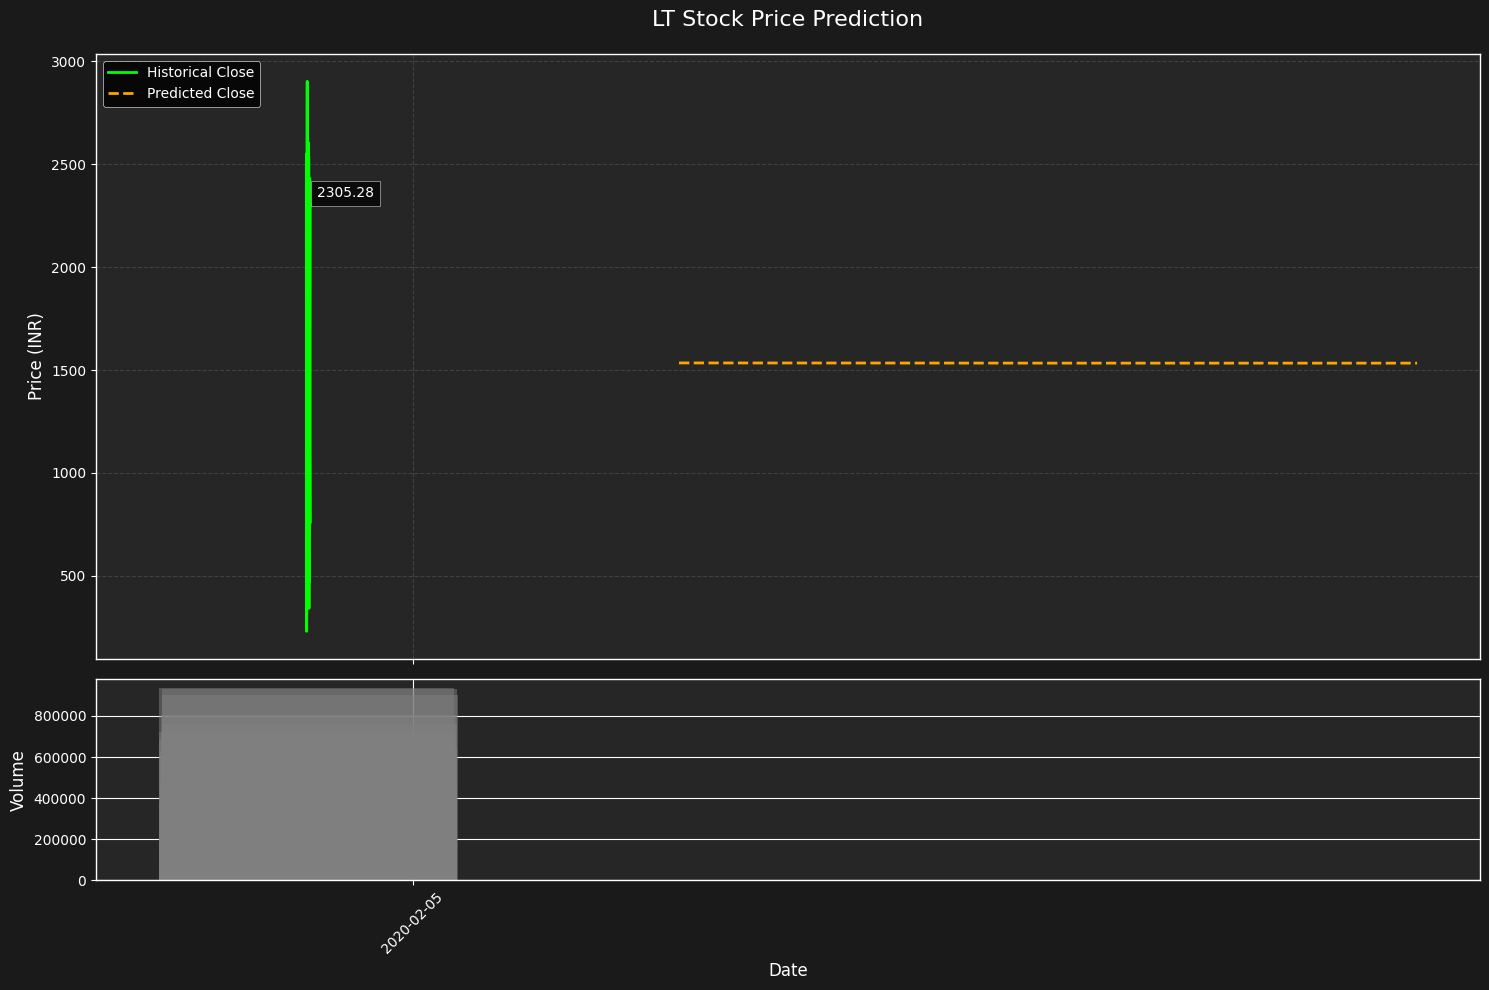

Predicted prices for LT for next 3 days:
2020-02-05: 1534.47
2020-02-06: 1533.54
2020-02-07: 1533.42


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming these are defined from previous stages:
# - model (trained LSTM)
# - scaler (fitted MinMaxScaler)
# - df (loaded DataFrame)
# - sequence_length = 10
# - features = ['Open', 'High', 'Low', 'Close', 'Volume']

def predict_for_stock(stock_symbol, days):
    # Filter data for selected stock
    df_stock = df[df['Stock Symbol'] == stock_symbol].copy()
    if df_stock.empty:
        print(f"No data found for {stock_symbol}")
        return

    # Prepare last sequence for prediction
    scaled_data = scaler.transform(df_stock[features])
    last_sequence = scaled_data[-sequence_length:]

    # Predict future prices
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days):
        next_price = predict_next_price(model, current_sequence, scaler)
        future_predictions.append(next_price)
        # Update sequence with new prediction
        new_row = current_sequence[-1].copy()
        scaled_next_price = scaler.transform([[0, 0, 0, next_price, 0]])[0, 3]
        new_row[3] = scaled_next_price
        current_sequence = np.append(current_sequence[1:], [new_row], axis=0)

    # Visualization - Stock Market Style
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), height_ratios=[3, 1], sharex=True)
    fig.patch.set_facecolor('#1a1a1a')  # Dark background
    ax1.set_facecolor('#262626')
    ax2.set_facecolor('#262626')

    # Historical data (last 30 points)
    historical_dates = df_stock['Date'].tail(30)
    historical_close = df_stock['Close'].tail(30)
    historical_volume = df_stock['Volume'].tail(30)

    # Plot historical close price
    ax1.plot(historical_dates, historical_close, 'lime', label='Historical Close', linewidth=2)

    # Plot future predictions
    last_date = historical_dates.iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=days + 1, freq='D')[1:]
    ax1.plot(future_dates, future_predictions, 'orange', linestyle='--', label='Predicted Close', linewidth=2)

    # Add annotation for last historical price
    ax1.annotate(f'{historical_close.iloc[-1]:.2f}',
                 xy=(historical_dates.iloc[-1], historical_close.iloc[-1]),
                 xytext=(5, 5), textcoords='offset points',
                 color='white', fontsize=10,
                 bbox=dict(facecolor='black', alpha=0.7))

    # Plot volume
    ax2.bar(historical_dates, historical_volume, color='gray', alpha=0.5, label='Volume')

    # Customize price chart (ax1)
    ax1.set_title(f'{stock_symbol} Stock Price Prediction', fontsize=16, color='white', pad=20)
    ax1.set_ylabel('Price (INR)', fontsize=12, color='white')
    ax1.legend(loc='upper left', fontsize=10, facecolor='black', edgecolor='white', labelcolor='white')
    ax1.grid(True, linestyle='--', alpha=0.3, color='gray')
    ax1.tick_params(axis='x', colors='white', rotation=45)
    ax1.tick_params(axis='y', colors='white')

    # Customize volume chart (ax2)
    ax2.set_xlabel('Date', fontsize=12, color='white')
    ax2.set_ylabel('Volume', fontsize=12, color='white')
    ax2.tick_params(axis='x', colors='white', rotation=45)
    ax2.tick_params(axis='y', colors='white')

    # Format x-axis dates
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))

    plt.tight_layout()
    plt.show()

    # Print predictions
    print(f"Predicted prices for {stock_symbol} for next {days} days:")
    for date, price in zip(future_dates, future_predictions):
        print(f"{date.strftime('%Y-%m-%d')}: {price:.2f}")

def predict_next_price(model, last_sequence, scaler):
    last_sequence = last_sequence.reshape((1, sequence_length, len(features)))
    next_pred = model.predict(last_sequence, verbose=0)[0][0]
    dummy = np.zeros((1, len(features)))
    dummy[0, 3] = next_pred
    return scaler.inverse_transform(dummy)[0, 3]

# User Interaction
stock_symbols = ['RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'HINDUNILVR',
                 'ICICIBANK', 'KOTAKBANK', 'SBIN', 'LT', 'AXISBANK']

print("Available stocks:", stock_symbols)
selected_stock = input("Enter stock symbol to predict: ").upper()
if selected_stock not in stock_symbols:
    print("Invalid stock symbol!")
else:
    days = int(input("Enter number of days to predict: "))
    predict_for_stock(selected_stock, days)